In [3]:
# Load C4 and C4 error:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [66]:
c4=np.loadtxt("/home/oliver/CfA/BOSS_DR12_Data/v3/CovMatricesAll/c4_n36_m18_full.txt")
c4err=np.loadtxt("/home/oliver/CfA/BOSS_DR12_Data/v3/CovMatricesAll/c4err_n36_m18_full.txt")
N_quads = 2.07e11

## N_eff from 2016 paper

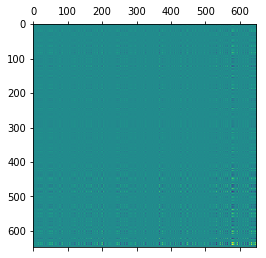

In [71]:
plt.matshow(prec)

In [72]:
prec

array([[-1.47194097e+06,  1.06056406e+08, -5.41764129e+06, ...,
        -8.44069270e+07,  4.56543537e+07, -1.96516796e+07],
       [-7.40732524e+05,  3.70305991e+07, -9.21902532e+05, ...,
        -3.13093088e+07,  1.66424370e+07, -7.46587938e+06],
       [-7.62820762e+05, -2.62223183e+06,  5.24243585e+05, ...,
         1.61489530e+06, -4.09862682e+05,  2.19692222e+05],
       ...,
       [ 2.74547112e+06, -5.99443914e+07,  9.75828097e+05, ...,
         4.57434787e+07, -2.46608915e+07,  1.28115248e+07],
       [ 4.14464222e+04,  2.87209580e+07, -2.86665596e+06, ...,
        -2.29528951e+07,  1.34461228e+07, -3.11225146e+06],
       [-2.95631275e+05,  4.04816018e+07, -2.47182826e+06, ...,
        -3.35139245e+07,  1.55343179e+07, -1.63094203e+06]])

In [68]:
N_bins=len(c4)
prec=np.linalg.inv(c4)
samples=[]
for a in range(int(0.7*len(c4)),len(c4)): # use large a bin
    for b in range(int(0.3*len(c4))): # use small b bin
        if prec[a,a]<=0.:
            continue # remove errors
        if prec[b,b]<=0.:
            continue
        samples.append(prec[a,b]/np.sqrt(prec[a,a]*prec[b,b]))
N_eff_av = N_bins+1./np.var(samples)

In [69]:
N_eff_av

648.0691371896256

### New Ross suggestion

In [97]:
N_eff=np.zeros_like(c4)
for a in range(len(c4)):
    for b in range(len(c4[a])):
        top=c4[a,a]*c4[b,b]+c4[a,b]**2.
        var = (c4err[a,b]-c4[a,b]**2.)/(N_quads-1.)
        N_eff[a,b]=top/var

In [105]:
np.prod(linalg.eigh(N_eff_8)[0])

-8.31701713606957e+300

(array([2.90000e+01, 3.71000e+02, 2.33700e+03, 1.58680e+04, 6.39410e+04,
        1.15834e+05, 1.14209e+05, 7.09000e+04, 3.37050e+04, 2.71000e+03]),
 array([0.31966635, 1.09819603, 1.8767257 , 2.65525538, 3.43378506,
        4.21231474, 4.99084442, 5.7693741 , 6.54790378, 7.32643345,
        8.10496313]),
 <a list of 10 Patch objects>)

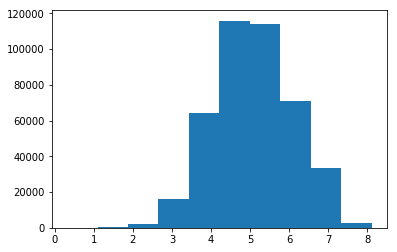

In [96]:
plt.hist(np.log10(N_eff.ravel()))

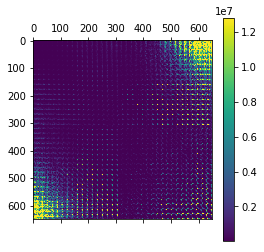

In [29]:
plt.matshow(N_eff,vmax=np.percentile(N_eff.ravel(),98),vmin=np.percentile(N_eff.ravel(),2))
plt.colorbar();